# Time-Series Data Imputation

### Objective: Handle missing values in a time-series dataset using methods specific to time-series, not regular tabular imputation.

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 2. Create a Time-Series Dataset with Missing Values

In [2]:
# Create date range
dates = pd.date_range(start="2023-01-01", periods=10, freq='D')

# Sample time-series data (e.g., daily sales)
data = {
    'sales': [100, 120, np.nan, 140, np.nan, 160, 170, np.nan, 190, 200]
}

df = pd.DataFrame(data, index=dates)
print("Original Time-Series Data:")
print(df)


Original Time-Series Data:
            sales
2023-01-01  100.0
2023-01-02  120.0
2023-01-03    NaN
2023-01-04  140.0
2023-01-05    NaN
2023-01-06  160.0
2023-01-07  170.0
2023-01-08    NaN
2023-01-09  190.0
2023-01-10  200.0


# 3. Check Missing Values

In [3]:
print("\nMissing Values Count:")
print(df.isnull().sum())



Missing Values Count:
sales    3
dtype: int64


# Method 1: Forward Fill (ffill)

In [4]:
df_ffill = df.fillna(method='ffill')


C:\Users\Admin\AppData\Local\Temp\ipykernel_12292\4093888281.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')


# Method 2: Backward Fill (bfill)

In [5]:
df_bfill = df.fillna(method='bfill')


C:\Users\Admin\AppData\Local\Temp\ipykernel_12292\3366056207.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df.fillna(method='bfill')


# Method 3: Linear Interpolation (Most Common)

In [6]:
df_linear = df.interpolate(method='linear')


# Method 4: Time-Based Interpolation

In [7]:
df_time = df.interpolate(method='time')


# Method 5: Rolling Window Imputation (Advanced)

In [8]:
df_rolling = df.fillna(df['sales'].rolling(window=3, min_periods=1).mean())


# 5. Visual Comparison

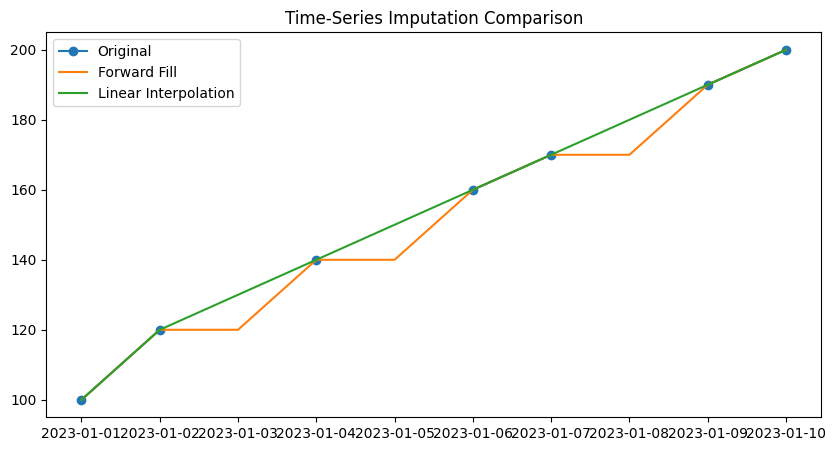

In [9]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df['sales'], label='Original', marker='o')
plt.plot(df_ffill.index, df_ffill['sales'], label='Forward Fill')
plt.plot(df_linear.index, df_linear['sales'], label='Linear Interpolation')
plt.legend()
plt.title("Time-Series Imputation Comparison")
plt.show()


# 6. Final Cleaned Data Example

In [10]:
print("\nCleaned Data (Linear Interpolation):")
print(df_linear)



Cleaned Data (Linear Interpolation):
            sales
2023-01-01  100.0
2023-01-02  120.0
2023-01-03  130.0
2023-01-04  140.0
2023-01-05  150.0
2023-01-06  160.0
2023-01-07  170.0
2023-01-08  180.0
2023-01-09  190.0
2023-01-10  200.0
